In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
train = load_files('C:\\Users\\quasar\\OneDrive\\Рабочий стол\\прога\\hw3\\aclImdb_v1\\aclImdb\\train')
test = load_files('C:\\Users\\quasar\\OneDrive\\Рабочий стол\\прога\\hw3\\aclImdb_v1\\aclImdb\\test')

In [3]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.data)
X_test = count_vect.transform(test.data)

print(X_train_counts.shape)
print(X_test.shape)

(25000, 74849)
(25000, 74849)


In [4]:
clf = LogisticRegression().fit(X_train_counts, train.target)
predicted = clf.predict(X_test)

C:\Program Files (x86)\Python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [22]:
from sklearn.metrics import *
acc = accuracy_score(test.target, predicted)
f1 = f1_score(test.target, predicted)
p = precision_score(test.target, predicted)
r = recall_score(test.target, predicted)
accuracy = print('acc={0:1.4f}'.format(acc))
compare = print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f1, p, r))


acc=0.8644
F1=0.8633, Precision=0.8702, Recall=0.8566


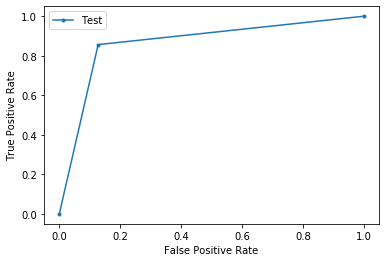

In [6]:
y_true = np.array(test.target)
y_predicted = np.array(predicted)
fpr, tpr, thrhld = roc_curve(y_true, y_predicted)
plt.plot(fpr, tpr, marker='.', label='Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [7]:
print(roc_auc_score(y_true, y_predicted))

0.8644000000000001


In [8]:
test.target[:10]

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1])

In [9]:
y_true

array([1, 0, 1, ..., 0, 0, 0])

In [10]:
def metrics(y_true, y_predicted):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    
    for i in range(len(predicted)):
        if y_true[i]==y_predicted[i]!=0:
            tp += 1
        if y_predicted[i]!=0 and y_true[i]!=y_predicted[i]:
            fp += 1
        if y_true[i]==y_predicted[i]==0:
            tn += 1
        if y_predicted[i]==0 and y_true[i]!=y_predicted[i]:
            fn += 1

    return(tp, fp, tn, fn)

In [11]:
metrics(y_true, y_predicted)

(10707, 1597, 10903, 1793)

In [18]:
def formulas(y_true, y_predicted):
    tp, fp, tn, fn = metrics(y_true, y_predicted)
    pr = tp/(tp + fp)
    rec = tp/(tp + fn)
    f = 2*pr*rec/(pr+rec)
    print('F1={0:1.4f}, Precision={1:1.4f}, Recall={2:1.4f}'.format(f, pr, rec))
    return pr, rec, f

In [24]:
formulas(y_true, y_predicted)

F1=0.8633, Precision=0.8702, Recall=0.8566
(0.870204811443433, 0.85656, 0.8633284954039671)
None
